In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import networkx as nx

In [3]:
from random import choices
a = 0.27
n = 10000
m = 5
deg = []
points = []
weights = []
G = nx.path_graph(n)

In [4]:
for i in range(m*n):
    deg.append(0)
    points.append(i)
    weights.append(a)
    t = choices(points, weights)[0]
    deg[t] += 1
    deg[i] += 1
    weights[t] += 1
    G.add_edge((i-1)//m , (t-1)//m )

[2.91767447]


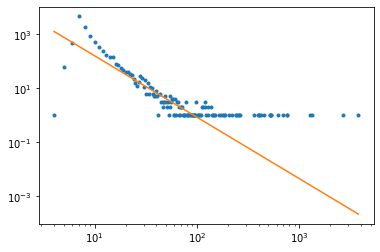

In [5]:
import math
from scipy.optimize import curve_fit
def func(x, c):
    return [n*c/math.pow(x_i, a+2) for x_i in x]
from collections import defaultdict
degrees = defaultdict(int)
for v in G.nodes():
    d = G.degree(v)
    degrees[d] += 1
xdata = sorted(degrees.keys())
ydata = [degrees[d] for d in xdata]
plt.loglog(xdata, ydata, ls='None', marker='.')
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
plt.loglog(xdata, func(xdata, *popt))
plt.show()